In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
7,3300,4,155.0
9,3700,5,167.0
11,2785,4,140.0
4,1200,2,51.0
14,2250,3,101.0


In [5]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis=1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):

        y_predicted = np.dot(w, scaled_X.T) + b
        w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_predicted))
        b_grad = -(2 / total_samples) * np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [8]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)

In [9]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

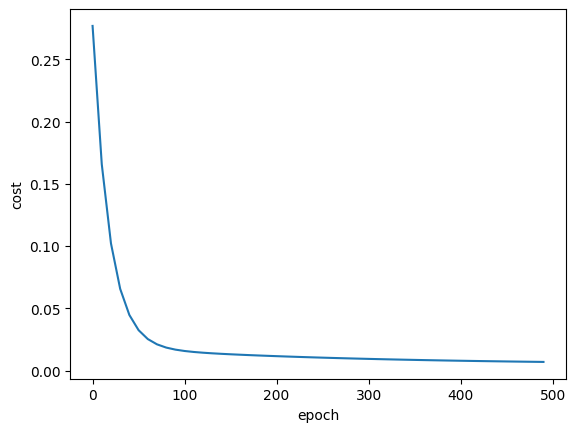

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [11]:
import random

In [22]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2 / total_samples) * (sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2 / total_samples) * np.sum(sample_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y - y_predicted)

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
        

In [23]:
sgd_w, sgd_b, sgd_cost, sgd_cost_list, sgd_epoch_list = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)

In [24]:
sgd_w, sgd_b, sgd_cost

(array([0.70649868, 0.67326178]), -0.23159654339308908, 0.006271352093769181)

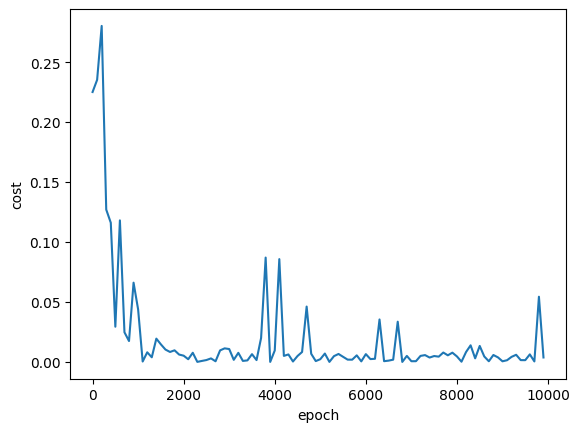

In [25]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(sgd_epoch_list, sgd_cost_list)

In [37]:
def mini_batch_gradient_descent(X, y_true, epochs, batch_size=10, learning_rate = 0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        indices = np.random.choice(total_samples, size=batch_size, replace=False)
        sample_x = X[indices]
        sample_y = y_true[indices]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2 / total_samples) * (sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2 / total_samples) * np.sum(sample_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(sample_y - y_predicted))

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
        

In [38]:
mb_w, mb_b, mb_cost, mb_cost_list, mb_epoch_list = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),1000)

In [39]:
mb_w, mb_b, mb_cost

(array([0.70366168, 0.6732707 ]), -0.2293426864576279, 0.004405011674192343)

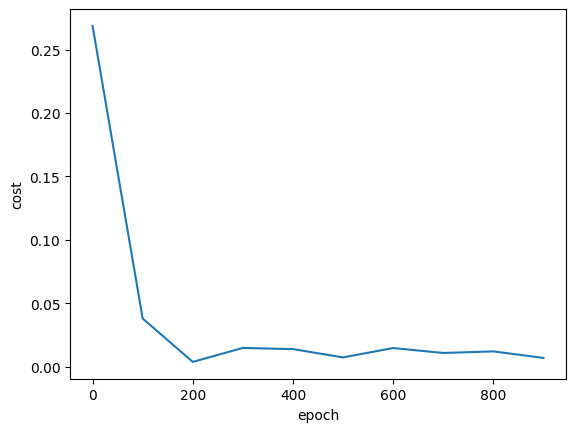

In [40]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(mb_epoch_list, mb_cost_list)